In [5]:
# !pip install art

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [7]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_shape=input_shape, activation='relu'))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

# opt = SGD(learning_rate=0.01)

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

classifier = KerasClassifier(model=dnn_model, use_logits=False)
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=128,validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

# hist = dnn_model.fit(x_train, y_train, epochs=10, batch_size=128,
#                      validation_data=(x_val, y_val),
#                      callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-20 20:50:40.191901: W tensorflow/c/c_api.cc:305] Operation '{name:'training_2/Adam/iter/Assign' id:669 op device:{requested: '', assigned: ''} def:{{{node training_2/Adam/iter/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_INT64, validate_shape=false](training_2/Adam/iter, training_2/Adam/iter/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-02-20 20:50:49.546648: W tensorflow/c/c_api.cc:305] Operation '{name:'loss_1/mul' id:588 op device:{requested: '', assigned: ''} def:{{{node loss_1/mul}} = Mu

Test accuracy: 0.97783643


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-20 20:53:15.258638: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_7/Softmax' id:530 op device:{requested: '', assigned: ''} def:{{{node dense_7/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_7/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [2.04231381e-02 2.07647143e-03 2.86100521e-05 2.31428592e-03
 5.97556755e-02 7.13139597e-06 4.32992134e-01 3.40015531e-03
 1.84171266e-02 0.00000000e+00 1.49957925e-02 7.91374956e-01
 5.12888312e-02 1.07122198e-04 2.32922849e-02 6.43744591e-05
 1.14172357e-04 3.71425918e-04 2.17798271e-02]
TPR: [0.00436263 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05102229
 0.         0.         0.00648426 0.         0.         0.
 0.        ]
FNR: [0.99563737 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.94897771
 1.         1.         0.99351574 1.         1.         1.
 1.        ]
TNR: [0.97957686 0.99792353 0.99997139 0.99768571 0.94024432 0.99999287
 0.56700787 0.99659984 0.98158287 1.         0.98500421 0.20862504
 0.94871117 0.99989288 0.97670772 0.99993563 0.99988583 0.99962857
 0.97822017]
Accuracy: 0.030143335948085288
Precision(micro,macro,weighted): 0

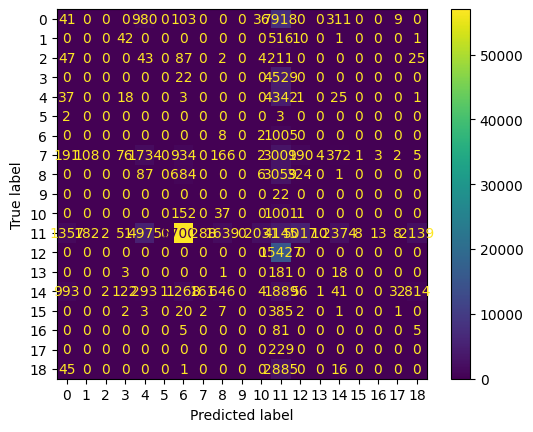

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.15
FPR: [3.00690962e-02 1.56809394e-03 6.43726173e-05 2.41010031e-03
 1.46255974e-01 4.77803530e-04 3.82250476e-01 1.73400381e-03
 1.21996928e-02 0.00000000e+00 1.94909342e-03 7.99698259e-01
 3.43020600e-02 9.28392381e-05 1.70118067e-02 1.14443483e-04
 2.85430894e-05 4.99996429e-04 1.78317782e-02]
TPR: [0.00915088 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04979136
 0.         0.         0.00316306 0.         0.         0.
 0.        ]
FNR: [0.99084912 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.95020864
 1.         1.         0.99683694 1.         1.         1.
 1.        ]
TNR: [0.9699309  0.99843191 0.99993563 0.9975899  0.85374403 0.9995222
 0.61774952 0.998266   0.98780031 1.         0.99805091 0.20030174
 0.96569794 0.99990716 0.98298819 0.99988556 0.99997146 0.9995
 0.98216822]
Accuracy: 0.02960136917920559
Precision(micro,macro,weighted): 0.0296

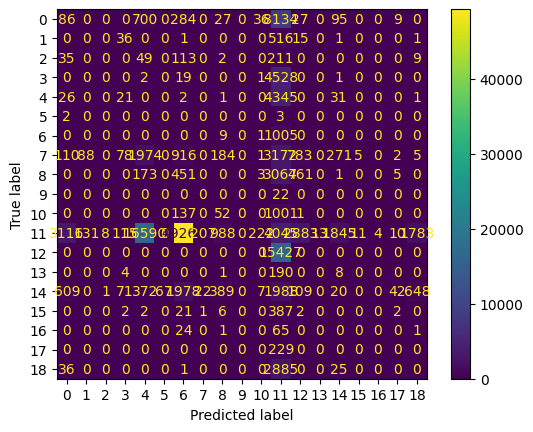

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [3.65583344e-02 1.14563941e-03 3.57625652e-05 2.41010031e-03
 1.89782258e-01 4.77803530e-04 3.55069497e-01 9.27315084e-04
 1.05387708e-02 0.00000000e+00 1.56790541e-03 8.04410842e-01
 1.95828626e-02 1.42829597e-04 1.24340027e-02 5.93675567e-04
 7.13577234e-06 6.92852194e-04 1.52240263e-02]
TPR: [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.0497175 0.        0.
 0.0026886 0.        0.        0.        0.       ]
FNR: [1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        0.9502825 1.        1.
 0.9973114 1.        1.        1.        1.       ]
TNR: [0.96344167 0.99885436 0.99996424 0.9975899  0.81021774 0.9995222
 0.6449305  0.99907268 0.98946123 1.         0.99843209 0.19558916
 0.98041714 0.99985717 0.987566   0.99940632 0.99999286 0.99930715
 0.98477597]
Accuracy: 0.028923910718105968
Precision(micro,macro,weighted): 0.028923910718105968,0.004660336035799

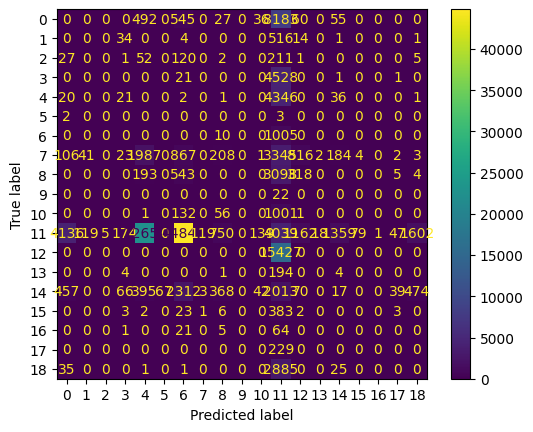

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.25
FPR: [4.02271616e-02 8.95030789e-04 1.43050261e-05 2.55750706e-03
 2.12042444e-01 0.00000000e+00 3.43059297e-01 5.35279438e-04
 8.93664244e-03 0.00000000e+00 1.62544322e-03 8.06936651e-01
 1.24596364e-02 1.42829597e-04 1.09329609e-02 8.58326121e-04
 1.42715447e-05 8.14279898e-04 1.12905458e-02]
TPR: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04902818
 0.         0.         0.00237229 0.         0.         0.
 0.        ]
FNR: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.95097182
 1.         1.         0.99762771 1.         1.         1.
 1.        ]
TNR: [0.95977284 0.99910497 0.99998569 0.99744249 0.78795756 1.
 0.6569407  0.99946472 0.99106336 1.         0.99837456 0.19306335
 0.98754036 0.99985717 0.98906704 0.99914167 0.99998573 0.99918572
 0.98870945]
Accuracy: 0.02851030449975041
Precision(micro,macro,weighted): 0.0285103

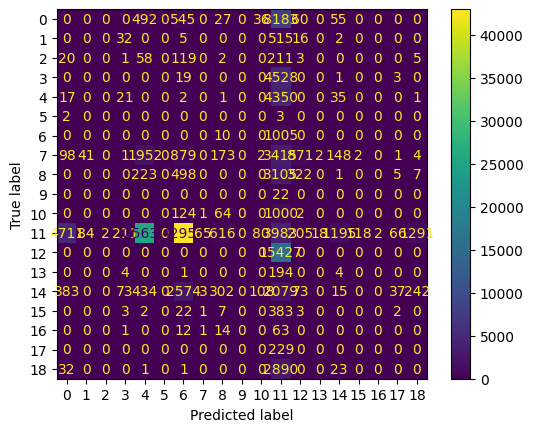

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [4.27647670e-02 8.30588572e-04 0.00000000e+00 2.68280279e-03
 2.24663667e-01 0.00000000e+00 3.34633481e-01 3.54339910e-04
 8.50303890e-03 0.00000000e+00 1.28740857e-03 8.07597769e-01
 1.06407699e-02 2.28527355e-04 9.73063395e-03 8.65478839e-04
 1.42715447e-05 9.85707245e-04 9.43306892e-03]
TPR: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04689866
 0.         0.         0.00094892 0.         0.         0.
 0.        ]
FNR: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.95310134
 1.         1.         0.99905108 1.         1.         1.
 1.        ]
TNR: [0.95723523 0.99916941 1.         0.9973172  0.77533633 1.
 0.66536652 0.99964566 0.99149696 1.         0.99871259 0.19240223
 0.98935923 0.99977147 0.99026937 0.99913452 0.99998573 0.99901429
 0.99056693]
Accuracy: 0.02721243671111745
Precision(micro,macro,weighted): 0.02721243

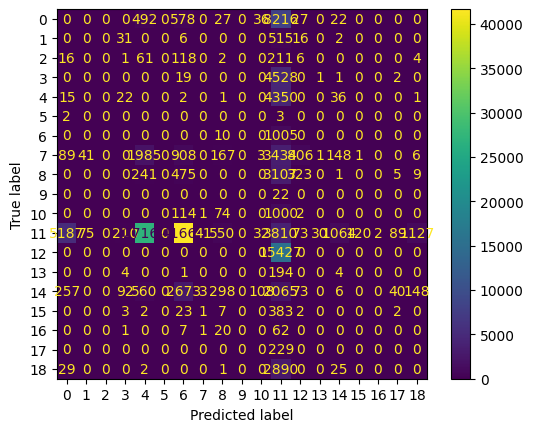

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import FastGradientMethod

epsilon_values = [0.1, 0.15, 0.2, 0.25, 0.3]

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = FastGradientMethod(classifier, eps=epsilon)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "fgsm",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/X-IIoTID/model.csv", mode='a', index=False)
